# Reading the small project data into Python

This file will show how to read the data from the files `train.h5` and `test.h5` into Python, for training.
The files are available at:

<https://www.nbi.dk/~petersen/Teaching/ML2020/SmallProject/train.h5>

<https://www.nbi.dk/~petersen/Teaching/ML2020/SmallProject/test.h5>

We start by opening the files and loading them into a Numpy array

In [1]:
import h5py
import pandas
from copy import deepcopy
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingClassifier
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

In [2]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        return pandas.DataFrame(f[name][:])

train = load_data('train')
test  = load_data('test')

Then we can verify the shape

In [3]:
print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)


As expected, the test set contains 2 columns less: `Truth` and `p_truth_E`.
    
Then we copy the variable list from the course website <https://www.nbi.dk/~petersen/Teaching/ML2020/SmallProject/VariableList.html>

In [4]:
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

Finally, we divide the training data into data (`X`) and labels (`y`)

In [5]:
X = train[all_variables]
y = train['Truth']

print (f'Shape of X: {X.shape}')
print (f'Shape of y: {y.shape}')

Shape of X: (162500, 160)
Shape of y: (162500,)


In [6]:
X.head(1)

,actualInteractionsPerCrossing,averageInteractionsPerCrossing,correctedActualMu,correctedAverageMu,correctedScaledActualMu,correctedScaledAverageMu,NvtxReco,p_nTracks,p_pt_track,p_eta,...,p_E5x7_Lr0,p_E5x7_Lr1,p_E5x7_Lr2,p_E5x7_Lr3,p_E7x11_Lr0,p_E7x11_Lr1,p_E7x11_Lr2,p_E7x11_Lr3,p_E7x7_Lr0,p_E7x7_Lr1
0,26.5,26.5,26.5,26.5,26.5,26.5,18,3,42011.792969,1.834715,...,215.588013,43402.332031,74045.820312,337.980713,273.708801,43091.683594,74447.539062,470.177124,273.708801,43091.683594


In [7]:
target_count = y.value_counts()

Proportion: 2.96 : 1


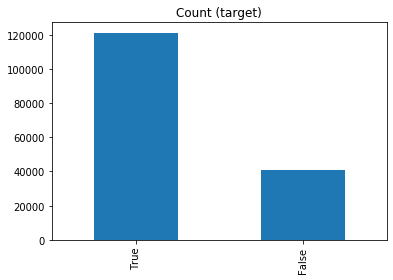

In [8]:
print('Proportion:', round(target_count[1] / target_count[0], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

## Preprocessing

### Check null values

In [9]:
train.isnull().sum()

eventNumber                       0
runNumber                         0
actualInteractionsPerCrossing     0
averageInteractionsPerCrossing    0
correctedActualMu                 0
                                 ..
p_E7x11_Lr2                       0
p_E7x11_Lr3                       0
p_E7x7_Lr0                        0
p_E7x7_Lr1                        0
index                             0
Length: 166, dtype: int64

No nulls
### Scale the data

In [10]:
transformed_X = deepcopy(X) 
# This loop transforms every variable _independently_ 
for variable in X.columns:     
    transformed_X[variable] = RobustScaler().fit_transform(np.array(transformed_X[variable]).reshape(-1,1))

### Select k Best features

In [33]:
from sklearn.feature_selection import SelectKBest, f_regression, f_classif

In [34]:
# Create and fit selector
selector = SelectKBest(score_func=f_classif, k=25)
X_25 = selector.fit_transform(transformed_X, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = train.iloc[:,cols]
features_df_new.columns

/Users/niallgray/opt/miniconda3/envs/aml/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 67  73  76 101 113 119 122 128 131 136] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/niallgray/opt/miniconda3/envs/aml/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Index(['correctedScaledAverageMu', 'p_eClusterLr0', 'p_dPhiTH3', 'p_R12',
       'p_fTG3', 'p_weta2', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_ndof',
       'p_E_Lr1_LowG', 'p_E_Lr3_HiG', 'p_deltaPhiRescaled3', 'p_e132',
       'p_e255', 'p_e2ts1', 'p_emins1', 'p_pos7', 'p_widths2', 'p_wtots1',
       'p_e237', 'p_e277', 'p_fracs1', 'p_E3x5_Lr2', 'p_E5x7_Lr2'],
      dtype='object')

## Bayesian optimisation of hyperparameters and cross validation

In [29]:
def GBC_CrossValidation(n_estimators, learning_rate, max_depth, data, targets):
    """Decision Tree cross validation.
       Fits a Decision Tree with the given paramaters to the target 
       given data, calculated a CV accuracy score and returns the mean.
       The goal is to find combinations
       that maximize the accuracy
    """
    
    estimator = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, 
                                 max_depth=max_depth, random_state=0)
    
    cval = cross_val_score(estimator, data, targets, scoring='accuracy', cv=5)
    
    return cval.mean()

In [30]:
def optimize_GBC(data, targets, pars, n_iter=5):
    """Apply Bayesian Optimization to Decision Tree parameters."""
    
    def crossval_wrapper(n_estimators, learning_rate, max_depth):
        """Wrapper of Decision Tree cross validation. 
           max_depth and n_estimators
           are cast to integer before we pass them along.
        """
        return GBC_CrossValidation(n_estimators=int(n_estimators), 
                                            learning_rate=learning_rate, 
                                            max_depth=int(max_depth),
                                            data=data, 
                                            targets=targets)

    optimizer = BayesianOptimization(f=crossval_wrapper, 
                                     pbounds=pars, 
                                     random_state=42, 
                                     verbose=100)
    optimizer.maximize(init_points=4, n_iter=n_iter)

    return optimizer

In [31]:
parameters_BayesianOptimization = {"learning_rate": (0.0001, 1), 
                                   "max_depth": (1, 5),
                                   "n_estimators": (50,500)
                                  }

BayesianOptimization = optimize_GBC(X_25, 
                                             y, 
                                             parameters_BayesianOptimization, 
                                             n_iter=5)
print(BayesianOptimization.max)

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------


KeyboardInterrupt: 

Cross-validation on result:

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=int(BayesianOptimization.max['params']['n_estimators']), 
                                 learning_rate=BayesianOptimization.max['params']['learning_rate'], 
                                 max_depth=BayesianOptimization.max['params']['max_depth'], 
                                 random_state=0)
scores = cross_val_score(gbc, X_25, y, cv=5, scoring='f1') 
print(f"{scores.mean():.4f} accuracy with a standard deviation of {scores.std():.4f}")

## LightGBM

In [35]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

data_train = lgb.Dataset(X_25, label=y)
params = {'objective': 'binary',
          'boosting_type': 'gbdt',
          'metric': 'binary_logloss',
          'learning_rate': 0.01,
          'num_leaves': 10,
          'max_depth': 10,
          'min_data': 10,
          'verbose': 0,
          'force_col_wise': True}

#lgb_clf = lgb.train(params, train_set=data_train, num_boost_round=300)
#lgb.cv(params, data_train, num_boost_round=300, nfold=5)


# y_pred = np.around(lgb_clf.predict(test_X))
# acc = accuracy_score(y_pred, test_y)
# print(f"Train accuracy: {acc*100.0:.2f}%")

# evaluate the model

model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# fit the model on the whole dataset
model.fit(X, y)


Accuracy: 0.945 (0.002)


LGBMClassifier()

In [36]:
import optuna
from optuna.samplers import TPESampler
from optuna.integration import LightGBMPruningCallback
from optuna.pruners import MedianPruner
import lightgbm as lgb

#%%

lgb_data_train = lgb.Dataset(X_25, label=y)


#%%


def objective(trial):

    boosting_types = ["gbdt", "rf", "dart"]
    boosting_type = trial.suggest_categorical("boosting_type", boosting_types)

    params = {
        "objective": "binary",
        "boosting": boosting_type,
        "max_depth": trial.suggest_int("max_depth", 2, 63),
        "min_child_weight": trial.suggest_loguniform("min_child_weight", 1e-5, 10),
        "scale_pos_weight": trial.suggest_uniform("scale_pos_weight", 10.0, 30.0),
    }

    N_iterations_max = 10_000
    early_stopping_rounds = 50

    if boosting_type == "dart":
        N_iterations_max = 100
        early_stopping_rounds = None

    cv_res = lgb.cv(
        params,
        lgb_data_train,
        num_boost_round=N_iterations_max,
        early_stopping_rounds=early_stopping_rounds,
        verbose_eval=False,
        seed=42,
        callbacks=[LightGBMPruningCallback(trial, "auc")],
    )

    num_boost_round = len(cv_res["auc-mean"])
    trial.set_user_attr("num_boost_round", num_boost_round)
    return cv_res["auc-mean"][-1]


#%%

study = optuna.create_study(
    direction="maximize",
    sampler=TPESampler(seed=42),
    pruner=MedianPruner(n_warmup_steps=50),
)



[I 2021-05-22 18:47:47,100] A new study created in memory with name: no-name-4657967a-ea39-4222-9bcc-232a22b4cd09


In [37]:
study.optimize(objective, n_trials=100, show_progress_bar=True)

/Users/niallgray/opt/miniconda3/envs/aml/lib/python3.8/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).





                                                                           


feature_fraction, val_score: 0.200055:  14%|#4        | 1/7 [78:35:32<00:50,  8.44s/it]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 97196, number of negative: 32804
[W 2021-05-22 18:49:02,999] Trial 0 failed because of the following error: LightGBMError('Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /tmp/pip-req-build-12fs9jsp/compile/src/boosting/rf.hpp, line 35 .\n')
Traceback (most recent call last):
  File "/Users/niallgray/opt/miniconda3/envs/aml/lib/python3.8/site-packages/optuna/_optimize.py", line 217, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-36-205b099d44e5>", line 35, in objective
    cv_res = lgb.cv(
  File "/Users/niallgray/opt/miniconda3/envs/aml/lib/python3.8/site-packages/lightgbm/engine.py", line 557, in cv
    c

LightGBMError: Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /tmp/pip-req-build-12fs9jsp/compile/src/boosting/rf.hpp, line 35 .


In [38]:
from sklearn.model_selection import KFold

import optuna.integration.lightgbm as lgb


dtrain = lgb.Dataset(X_25, label=y)

params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "verbosity": -1,
    "boosting_type": "gbdt",
}

tuner = lgb.LightGBMTunerCV(
    params, dtrain, verbose_eval=0, early_stopping_rounds=100, folds=KFold(n_splits=3), show_progress_bar=True
)

tuner.run()

print("Best score:", tuner.best_score)
best_params = tuner.best_params
print("Best params:", best_params)
print("  Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

[I 2021-05-22 18:49:19,275] A new study created in memory with name: no-name-799168dd-8c77-478b-8cf5-5acc0a19dbe5
bagging, val_score: 0.199870:  30%|###       | 3/10 [00:18<00:42,  6.11s/it][I 2021-05-22 18:52:35,550] Trial 29 finished with value: 0.19987020697375024 and parameters: {'bagging_fraction': 0.840081722766568, 'bagging_freq': 3}. Best is trial 29 with value: 0.19987020697375024.


regularization_factors, val_score: 0.199574:  70%|#######   | 14/20 [01:39<00:46,  7.67s/it][I 2021-05-22 18:55:34,387] Trial 56 finished with value: 0.19983485777132956 and parameters: {'lambda_l1': 0.409850138426331, 'lambda_l2': 0.002048970580670522}. Best is trial 43 with value: 0.19957367190652828.


min_data_in_leaf, val_score: 0.199386: 100%|##########| 5/5 [00:40<00:00,  8.07s/it]

Best score: 0.19938617897042646
Best params: {'objective': 'binary', 'metric': 'binary_logloss', 'verbosity': -1, 'boosting_type': 'gbdt', 'feature_pre_filter': False, 'lambda_l1': 0.0021162855817617346, 'lambda_l2': 9.484825815823141, 'num_leaves': 31, 'feature_fraction': 0.5, 'bagging_fraction': 0.840081722766568, 'bagging_freq': 3, 'min_child_samples': 50}
  Params: 
    objective: binary
    metric: binary_logloss
    verbosity: -1
    boosting_type: gbdt
    feature_pre_filter: False
    lambda_l1: 0.0021162855817617346
    lambda_l2: 9.484825815823141
    num_leaves: 31
    feature_fraction: 0.5
    bagging_fraction: 0.840081722766568
    bagging_freq: 3
    min_child_samples: 50


In [ ]:
data_train = lgb.Dataset(X_25, label=y)
params = best_params


# evaluate the model

model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# fit the model on the whole dataset
model.fit(X, y)

Accuracy: 0.945 (0.002)
